# Day 4 - Classification

In this day we will do practices on classification algorithms. The metrics used are Confusion Matrix Accuracy, F1 score, Precision and Recall.L

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hr_data.csv')

## EDA

In [3]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [4]:
df.sample()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1270,34,Travel_Rarely,511,Sales,3,2,Life Sciences,1,1779,4,Female,32,1,2,Sales Executive,4,2,5862.148479,25353,5,Y,No,12,3,1,80,0,6,3,3,2,2,2,2,NaN


In [5]:
df.shape

(1470, 35)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.000000,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.000000,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.000000,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.000000,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.000000,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.750000,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.000000,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.750000,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.000000,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.000000,5.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [8]:
df.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

##### Above we can see that there are 265 null data in Attrition column with empty data.

In [9]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [10]:
df["Attrition"].value_counts()

Attrition
No     1020
Yes     185
Name: count, dtype: int64

In [11]:
import seaborn as sns

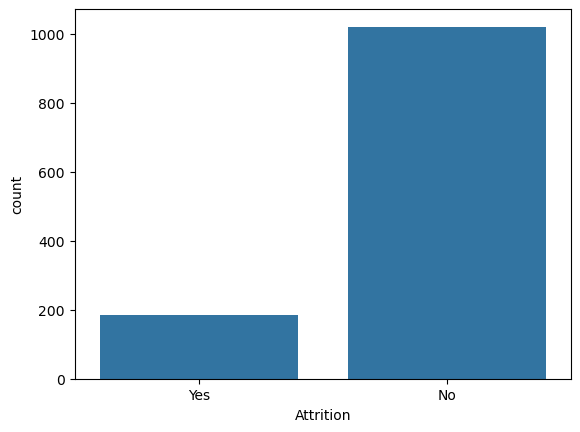

In [12]:
sns.countplot(x=df["Attrition"]);

### Use 1 and 0 in place of Yes and No for Attrition column.

In [13]:
df["Attrition"] = df["Attrition"].map({'Yes': 1, 'No': 0})

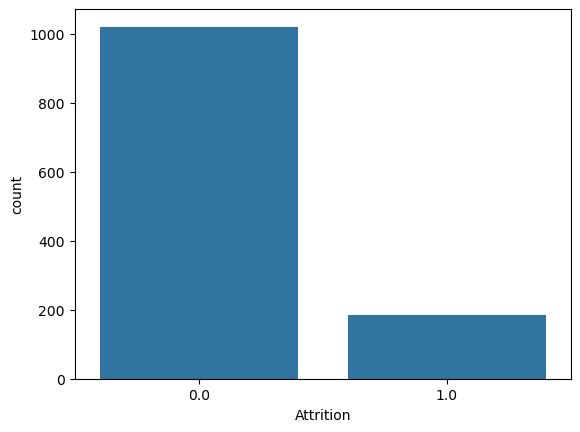

In [14]:
sns.countplot(x=df["Attrition"]);

In [15]:
df["Attrition"].value_counts()

Attrition
0.0    1020
1.0     185
Name: count, dtype: int64

#### Split the empty data

In [16]:
empty = df[df['Attrition'].isnull()]
full = df[df['Attrition'].notnull()]

In [17]:
empty.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
367,50,Travel_Rarely,1046,Research & Development,10,3,Technical Degree,1,491,4,Male,100,2,3,Healthcare Representative,4,2,9587.987822,2755,6,Y,No,15,3,4,80,0,20,2,3,4,3,1,3,NaN
368,40,Travel_Rarely,575,Sales,22,2,Marketing,1,492,3,Male,68,2,2,Sales Executive,3,1,5910.500884,6110,2,Y,Yes,12,3,1,80,2,8,6,3,6,4,1,0,NaN
369,31,Travel_Rarely,408,Research & Development,9,4,Life Sciences,1,493,3,Male,42,2,1,Research Scientist,2,2,2611.940519,7551,0,Y,Yes,16,3,4,80,0,3,5,3,2,2,2,2,NaN
370,21,Travel_Rarely,156,Sales,12,3,Life Sciences,1,494,3,Female,90,4,1,Sales Representative,2,2,1963.485226,25422,1,Y,No,15,3,4,80,0,1,0,3,1,0,0,0,NaN
371,29,Travel_Rarely,1283,Research & Development,23,3,Life Sciences,1,495,4,Male,54,3,1,Research Scientist,4,2,2761.033309,18168,9,Y,No,16,3,4,80,0,6,4,3,3,2,1,2,NaN


In [18]:
full.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0.0


##### The idea is to guess the attrition of empty set from the full set.

In [19]:
x = full.drop('Attrition', axis=1)
y = full[['Attrition']]

In [20]:
y.head()

,Attrition
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [21]:
x = pd.get_dummies(x, drop_first=True)

In [22]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,2,5993.0,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,49,279,8,1,1,2,3,61,2,2,2,1,5130.0,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,37,1373,2,2,1,4,4,92,2,1,3,2,2090.0,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True
3,33,1392,3,4,1,5,4,56,3,1,3,1,2909.0,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,27,591,2,1,1,7,1,40,3,1,2,1,3468.0,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False


In [23]:
x.shape

(1205, 46)

In [24]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [25]:
g = GaussianNB()
b = BernoulliNB()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
g.fit(x_train, y_train)

GaussianNB()

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
g_pred = g.predict(x_test)

In [31]:
accuracy_score(g_pred, y_test)

0.7883817427385892

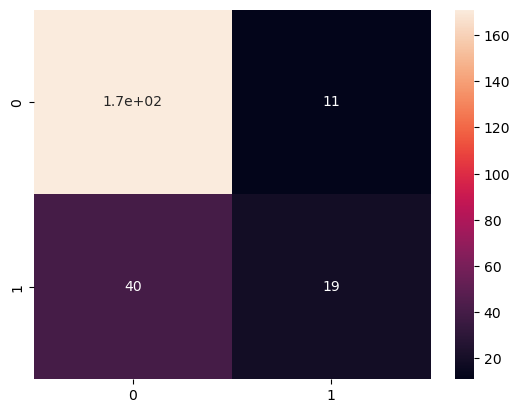

In [32]:
cm = confusion_matrix(g_pred, y_test)
sns.heatmap(cm, annot=True);

In [33]:
print(classification_report(g_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       182
         1.0       0.63      0.32      0.43        59

    accuracy                           0.79       241
   macro avg       0.72      0.63      0.65       241
weighted avg       0.77      0.79      0.76       241



In [34]:
b.fit(x_train, y_train)

BernoulliNB()

In [35]:
b_pred = b.predict(x_test)

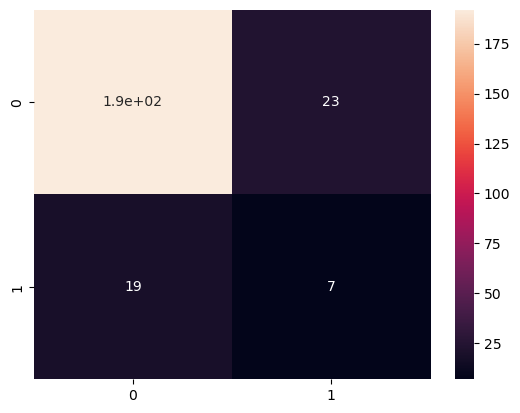

In [36]:
cm = confusion_matrix(b_pred, y_test)
sns.heatmap(cm, annot=True);

In [37]:
print(classification_report(b_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       215
         1.0       0.23      0.27      0.25        26

    accuracy                           0.83       241
   macro avg       0.57      0.58      0.58       241
weighted avg       0.84      0.83      0.83       241



###### LogisticRegression works like regression, only it returns 1 or 0.

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
l = LogisticRegression()

In [40]:
l_pred = l.fit(x_train, y_train).predict(x_test)

In [41]:
print(classification_report(l_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93       239
         1.0       0.00      0.00      0.00         2

    accuracy                           0.87       241
   macro avg       0.50      0.44      0.46       241
weighted avg       0.98      0.87      0.92       241



In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
d = DecisionTreeClassifier()

In [44]:
d.fit(x_train, y_train)
d_pred = d.predict(x_test)

In [45]:
print(classification_report(d_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       200
         1.0       0.30      0.22      0.25        41

    accuracy                           0.78       241
   macro avg       0.57      0.56      0.56       241
weighted avg       0.76      0.78      0.77       241



In [46]:
confusion_matrix(d_pred, y_test)

array([[179,  21],
       [ 32,   9]])

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
r = RandomForestClassifier()

In [52]:
r.fit(x_train, y_train)
r_pred = r.predict(x_test)

In [53]:
confusion_matrix(r_pred, y_test)

array([[209,  27],
       [  2,   3]])

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
gbc = GradientBoostingClassifier()

In [57]:
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)

In [58]:
confusion_matrix(gbc_pred, y_test)

array([[208,  24],
       [  3,   6]])

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
k = KNeighborsClassifier()

In [61]:
k.fit(x_train, y_train)
k_pred = k.predict(x_test)

In [62]:
confusion_matrix(k_pred, y_test)

array([[205,  29],
       [  6,   1]])